### Insert useful libraries 

In [112]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import datetime as dt

## Explore data

**What data we have to use:**

- interactions_train.csv: **698,901** rows dataset, 97% of the whole data set. Columns:
  - 'user_id', 
  - 'recipe_id' 
  - 'date' 
  - 'rating' 
  - 'u'
  - 'i'
- interactions_test.csv: **12,455** rows dataset, 1.7% of the whole data set. Columns:
  - 'user_id'
  - 'recipe_id'
  - 'date' 
  - 'rating'
  - 'u'
  - 'i' 
- interactions_validate.csv: **7,023** rows dataset, 0.9% of the whole data set. Columns:
  - 'user_id'
  - 'recipe_id'
  - 'date'
  - 'rating'
  - 'u'
  - 'i'
- RAW_interations.csv: **1,132,367** rows dataset. Raw data of users rating and order info. Columns: 
  - 'user_id'
  - 'recipe_id'
  - 'date'
  - 'rating'
  - 'reviews' 
- PP_users.csv: **25076** rows dataset. Token data of each **UNIQUE** user's orders and rating information. Columns:
  - 'u'
  - 'techniques'
  - 'items'
  - 'n_items'
  - 'ratings'
  - 'n_ratings' 
- RAW_recipes.csv: **231,637** rows dataset. This is a raw data about the recipes. Columns: 
  - 'name'
  - 'id'
  - 'minutes'
  - 'contributor_id'
  - 'submitted'
  - 'tags'
  - 'nutrition'
  - 'n_steps'
  - 'steps'
  - 'description'
  - 'ingredients'
  - 'n_ingredients' 
- PP_recipes.csv: **178,265** rows dataset. Has more or less the same information as 'RAW_recipes" data but in tokens. It has tokenized all the words into numbers. Columns:
  - 'id'
  - 'i'
  - 'name_tokens'
  - 'ingredient_tokens'
  - 'steps_tokens'
  - 'techniques'
  - 'calorie_level'
  - 'ingredient_ids' 

**Data explanation:**

-**'u'**: the identifier of the users, like user_id, but in 'PP_user' dataset has very important use, because 'u' is the unique value for the users_id. 

-**'i'**: the identifier of recipe, like recipe_id, but specially use for tokenizing.

-**items**: the recipes which users have oreder, but used 'i'


In [113]:
test = pd.read_csv('interactions_test.csv')
test.head()

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935


In [114]:
test.shape

(12455, 6)

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12455 entries, 0 to 12454
Data columns (total 6 columns):
user_id      12455 non-null int64
recipe_id    12455 non-null int64
date         12455 non-null object
rating       12455 non-null float64
u            12455 non-null int64
i            12455 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 583.9+ KB


In [116]:
test.shape

(12455, 6)

In [117]:
train = pd.read_csv('interactions_train.csv')
train.shape

(698901, 6)

In [118]:
validate = pd.read_csv('interactions_validation.csv')
validate.shape

(7023, 6)

In [119]:
df = pd.read_csv('RAW_interactions.csv')
df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [120]:
df.shape

(1132367, 5)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
user_id      1132367 non-null int64
recipe_id    1132367 non-null int64
date         1132367 non-null object
rating       1132367 non-null int64
review       1132198 non-null object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [122]:
df1 = pd.read_csv('PP_users.csv')
df1.head(2)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39


In [123]:
df1.shape

(25076, 6)

In [124]:
df1.describe()

,u,n_items,n_ratings
count,25076.000000,25076.000000,25076.000000
mean,12537.500000,27.871311,27.871311
std,7238.962011,122.729039,122.729039
min,0.000000,2.000000,2.000000
25%,6268.750000,3.000000,3.000000
50%,12537.500000,6.000000,6.000000
75%,18806.250000,16.000000,16.000000
max,25075.000000,6437.000000,6437.000000


In [125]:
df1['u'].duplicated().value_counts()

False    25076
Name: u, dtype: int64

In [126]:
df2 = pd.read_csv('RAW_recipes.csv')
df2.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6


In [127]:
df2.shape

(231637, 12)

In [128]:
df3 = pd.read_csv('PP_recipes.csv')
df3.head(2)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."


In [129]:
df3.shape

(178265, 8)

In [130]:
# Have a simple check on whether the tokens correspond with the words, one example from the id 146223, the 2 row of the df1. 
df3['techniques'].iloc[1]
# as the result, there are 12 tokens in ingredient_token column of id 146223

'[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]'

In [131]:
# Lets have a look at table df, see what ingredients are there, and how many are
lis = df2[(df2['id'] == 146223)]['ingredients']
[print(x) for x in lis] 
# there are also 12 ingredients, it corresponde with the tokens. If we look at the tokens, it is actually one token
# corresponde with one single word

['flour', 'oats', 'brown sugar', 'pecans', 'butter', 'eggs', 'solid pack pumpkin', 'sweetened condensed milk', 'cinnamon', 'ginger', 'nutmeg', 'salt']


[None]

## Clean and Tidy Data

**Possible data problems:**

- Missing data
<br>
- Unformatted data
<br>
- Data format incorrect
<br>
- Duplicated data
<br>
- Too many dataset can also lead misunderstanding

### Merge data

In [132]:
# Join train, test and validate data together
df_join = test.append(train)
df_join = df_join.append(validate)
df_join.shape

(718379, 6)

In [133]:
# Join the df_join table together with RAW_interactions table
df_review = df_join.merge(df, on = ['user_id', 'recipe_id', 'date','rating'], how = 'outer')
df_review.head(2)

,user_id,recipe_id,date,rating,u,i,review
0,8937,44551,2005-12-23,4.0,2.0,173538.0,I made this and took it to several holiday fun...
1,56680,126118,2006-10-07,4.0,16.0,177847.0,"This was really great, directions are right on..."


In [134]:
df_review.shape

(1132367, 7)

In [135]:
# I will like to know more about the recipe information, and how do they interact with users, I will join the previous table 
# with the recipe table df2, but firstly need to change the name of 'id' into 'recipe_id'
df2 = df2.rename(columns={'id': 'recipe_id'})
df_total = df_review.merge(df2, on ='recipe_id', how = 'outer')
df_total.head(2)

,user_id,recipe_id,date,rating,u,i,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,8937,44551,2005-12-23,4.0,2.0,173538.0,I made this and took it to several holiday fun...,strawberry fudge,40,26399,2002-10-29,"['60-minutes-or-less', 'time-to-make', 'course...","[85.0, 2.0, 67.0, 0.0, 0.0, 2.0, 5.0]",9,['combine first 6 ingredients in a buttered 3-...,a nice change of pace from the traditional cho...,"['sugar', 'strawberry gelatin', 'salt', 'milk'...",9
1,269981,44551,2005-12-12,0.0,NaN,NaN,"Sorry this fudge did not turn out well for me,...",strawberry fudge,40,26399,2002-10-29,"['60-minutes-or-less', 'time-to-make', 'course...","[85.0, 2.0, 67.0, 0.0, 0.0, 2.0, 5.0]",9,['combine first 6 ingredients in a buttered 3-...,a nice change of pace from the traditional cho...,"['sugar', 'strawberry gelatin', 'salt', 'milk'...",9


### Incorrect data format

**Date data**

There are two tables with date data, one is the df_join table(which I joined train, test and validate data together). Another table with data is the df from 'RAW_interations' data.

**String data**

IDs should be inn string instead of integer or float. So **user_id, recip_id, u and i** all should be in string format.

In [136]:
# Firstly look at convert the date of df_join into a correct format
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 18 columns):
user_id           1132367 non-null int64
recipe_id         1132367 non-null int64
date              1132367 non-null object
rating            1132367 non-null float64
u                 718379 non-null float64
i                 718379 non-null float64
review            1132198 non-null object
name              1132366 non-null object
minutes           1132367 non-null int64
contributor_id    1132367 non-null int64
submitted         1132367 non-null object
tags              1132367 non-null object
nutrition         1132367 non-null object
n_steps           1132367 non-null int64
steps             1132367 non-null object
description       1108857 non-null object
ingredients       1132367 non-null object
n_ingredients     1132367 non-null int64
dtypes: float64(3), int64(6), object(9)
memory usage: 164.1+ MB


In [137]:
df_total['date'] = pd.to_datetime(df_total['date'].astype(str), format='%Y-%m-%d')
df_total['submitted'] = pd.to_datetime(df_total['submitted'].astype(str), format='%Y-%m-%d')

In [138]:
print(df_total['date'].max())
print(df_total['date'].min())
print(df_total['submitted'].max())
print(df_total['submitted'].min())

2018-12-20 00:00:00
2000-01-25 00:00:00
2018-12-04 00:00:00
1999-08-06 00:00:00


In [139]:
df_total[['user_id','recipe_id', 'u','i']] = df_total[['user_id','recipe_id', 'u','i']].astype(str)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 18 columns):
user_id           1132367 non-null object
recipe_id         1132367 non-null object
date              1132367 non-null datetime64[ns]
rating            1132367 non-null float64
u                 1132367 non-null object
i                 1132367 non-null object
review            1132198 non-null object
name              1132366 non-null object
minutes           1132367 non-null int64
contributor_id    1132367 non-null int64
submitted         1132367 non-null datetime64[ns]
tags              1132367 non-null object
nutrition         1132367 non-null object
n_steps           1132367 non-null int64
steps             1132367 non-null object
description       1108857 non-null object
ingredients       1132367 non-null object
n_ingredients     1132367 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(4), object(11)
memory usage: 164.1+ MB


### Missing data

#### Missing data in columns

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. I will need to identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data. Besides, I will plot a histogram graph to better visualize the columns with missing data.

In [140]:
# Create one function to check the missing data per each column and also the percentage of the missing data
def assess_missing_data(df):
    '''
    A function to find out the missing data and its statistic information
    
    input:
    df: the data frame
    
    output:
    df_stats: the statistic information of missing column, will be missing value count and
    missing value percentage
    '''
    
    rec = []
    for column_name in df.columns:
        miss_count = df[column_name].isnull().sum(axis=0)
        miss_percent=miss_count/df.shape[0]
        rec.append([column_name,miss_count,miss_percent*100])
        df_stats = pd.DataFrame.from_records(rec, columns = ['column name', 
                                                             'missing_count','missing_percentage'])  
        df_stats = df_stats.sort_values('missing_percentage',axis=0, ascending = False )
    return df_stats

In [141]:
# df_review data
assess_missing_data(df_total)

,column name,missing_count,missing_percentage
15,description,23510,2.076182
6,review,169,0.014924
7,name,1,0.000088
0,user_id,0,0.000000
10,submitted,0,0.000000
16,ingredients,0,0.000000
14,steps,0,0.000000
13,n_steps,0,0.000000
12,nutrition,0,0.000000
11,tags,0,0.000000


#### Missing data in rows

Now I will perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. I will again plot a visual graph to let you see the distribution of rows with missing data. But since we are not able to show all the rows, so I will not use the function I created from the previous part.

Text(0.5, 0, 'number of missing data')

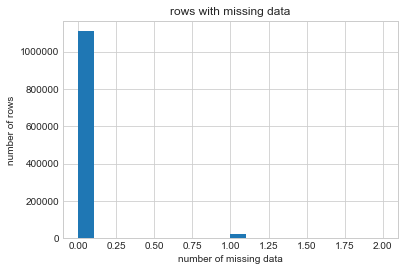

In [142]:
df_total.isnull().sum(axis=1).hist(bins = 20)
plt.title('rows with missing data')
plt.ylabel('number of rows')
plt.xlabel('number of missing data')

Quite clean dataset, there is only review has 169 null data, we can fill it with 0.

In [143]:
df_total = df_total.fillna(0)
df_total.isnull().sum()

user_id           0
recipe_id         0
date              0
rating            0
u                 0
i                 0
review            0
name              0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

#### Not proper data

Since we might also use minutes, we probably like to calculate the minutes into hours.

In [153]:
df_total['cooking_time'] = df_total['minutes']/60

In [189]:
df2 = pd.DataFrame(df_total['ingredients'].str.split().values.tolist())
df2.head()

## Analyze Data

In [144]:
df_total.head(2)

,user_id,recipe_id,date,rating,u,i,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,8937,44551,2005-12-23,4.0,2.0,173538.0,I made this and took it to several holiday fun...,strawberry fudge,40,26399,2002-10-29,"['60-minutes-or-less', 'time-to-make', 'course...","[85.0, 2.0, 67.0, 0.0, 0.0, 2.0, 5.0]",9,['combine first 6 ingredients in a buttered 3-...,a nice change of pace from the traditional cho...,"['sugar', 'strawberry gelatin', 'salt', 'milk'...",9
1,269981,44551,2005-12-12,0.0,nan,nan,"Sorry this fudge did not turn out well for me,...",strawberry fudge,40,26399,2002-10-29,"['60-minutes-or-less', 'time-to-make', 'course...","[85.0, 2.0, 67.0, 0.0, 0.0, 2.0, 5.0]",9,['combine first 6 ingredients in a buttered 3-...,a nice change of pace from the traditional cho...,"['sugar', 'strawberry gelatin', 'salt', 'milk'...",9


### The most popular recipes

In [53]:
df_total.groupby(['recipe_id','name'])['user_id'].count().sort_values(ascending=False).head(20)

recipe_id  name                                                      
2886       best banana bread                                             1613
27208      to die for crock pot roast                                    1601
89204      crock pot chicken with black beans   cream cheese             1579
39087      creamy cajun chicken pasta                                    1448
67256      best ever banana cake with cream cheese frosting              1322
54257      yes  virginia there is a great meatloaf                       1305
22782      jo mama s world famous spaghetti                              1234
32204      whatever floats your boat  brownies                           1220
69173      kittencal s italian melt in your mouth meatballs               997
68955      japanese mum s chicken                                         904
33919      creamy burrito casserole                                       877
82102      kittencal s moist cheddar garlic oven fried chicken breast   

Lets list the top 20 most popular recipes (the IDs and the name of recipes).

### Top ranked recipes

In [54]:
df_total.groupby(['recipe_id','name'])['rating'].value_counts().sort_values(ascending=False).head(20)

recipe_id  name                                                        rating
2886       best banana bread                                           5.0       1252
39087      creamy cajun chicken pasta                                  5.0       1191
27208      to die for crock pot roast                                  5.0       1131
67256      best ever banana cake with cream cheese frosting            5.0       1042
89204      crock pot chicken with black beans   cream cheese           5.0       1009
32204      whatever floats your boat  brownies                         5.0       1007
22782      jo mama s world famous spaghetti                            5.0        957
54257      yes  virginia there is a great meatloaf                     5.0        925
69173      kittencal s italian melt in your mouth meatballs            5.0        879
82102      kittencal s moist cheddar garlic oven fried chicken breast  5.0        688
28148      oven fried chicken chimichangas                    

We have here the most ranked recipes. Interesting thing is the top 1 ranked recipe is the same as the most popular recipes.

### Distribution of the ratings

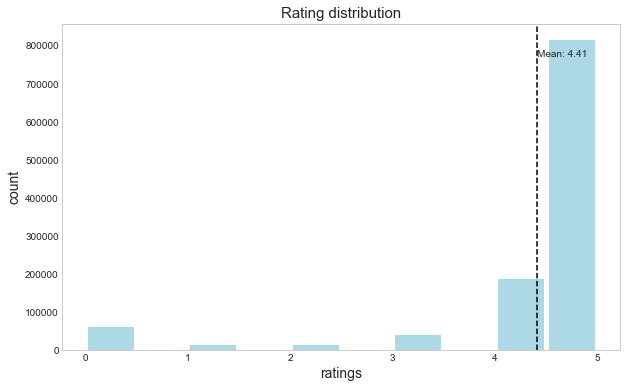

In [102]:
ax = df_total.hist(column='rating', bins=10, grid=False, figsize=(10,6), color='lightblue', zorder=2, rwidth=0.9)
plt.xlabel('ratings', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Rating distribution', fontsize=15)
plt.axvline(df_total['rating'].mean(), color='k', linestyle='--')
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1, max_ylim*0.9, 'Mean: {:.2f}'.format(df_total['rating'].mean()))
plt.show()

### Distribution of the number of steps

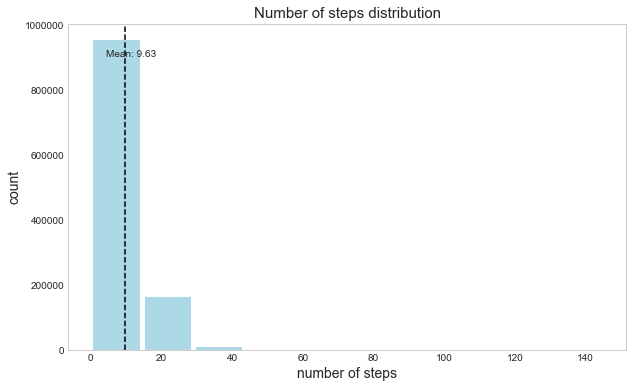

In [104]:
ax = df_total.hist(column='n_steps', bins=10, grid=False, figsize=(10,6), color='lightblue', zorder=2, rwidth=0.9)
plt.xlabel('number of steps', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Number of steps distribution', fontsize=15)
plt.axvline(df_total['n_steps'].mean(), color='k', linestyle='--')
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1, max_ylim*0.9, 'Mean: {:.2f}'.format(df_total['n_steps'].mean()))
plt.show()

### Distribution of cooking time

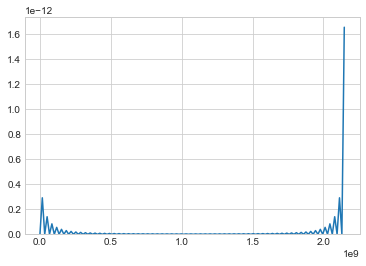

In [180]:
data = df_total['minutes']
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.5)

### Correlation between the most popular recipes with the other factors.